Import the necessary Libraries and the Dataset

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# Load the dataset
file_path = "C:/Users/James Ga-as/Downloads/dinosaurs.csv"
dinosaurs_df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
dinosaurs_df.head(5)

In [ ]:
# Get more information about the dataset
dinosaurs_df.info()
dinosaurs_df.describe()
dinosaurs_df.isnull().sum()

Although this dataset offers useful information. The dataset has gaps that may affect the data analysis. More study or data gathering to fill these gaps would improve the dataset's accuracy and provide deeper understanding of the traits of dinosaurs and their evolutionary background.

In [ ]:
# 1. What is the distribution of dinosaur lengths?

plt.figure(figsize=(10, 6))
plt.hist(dinosaurs_df['length_m'].dropna(), bins=30, edgecolor='k')
plt.title('Distribution of Dinosaur Lengths')
plt.xlabel('Length (meters)')
plt.ylabel('Frequency')
plt.show()


The distribution of dinosaur lengths shows a right-skewed distribution, it indicates that most dinosaurs is less than 20 meters long.

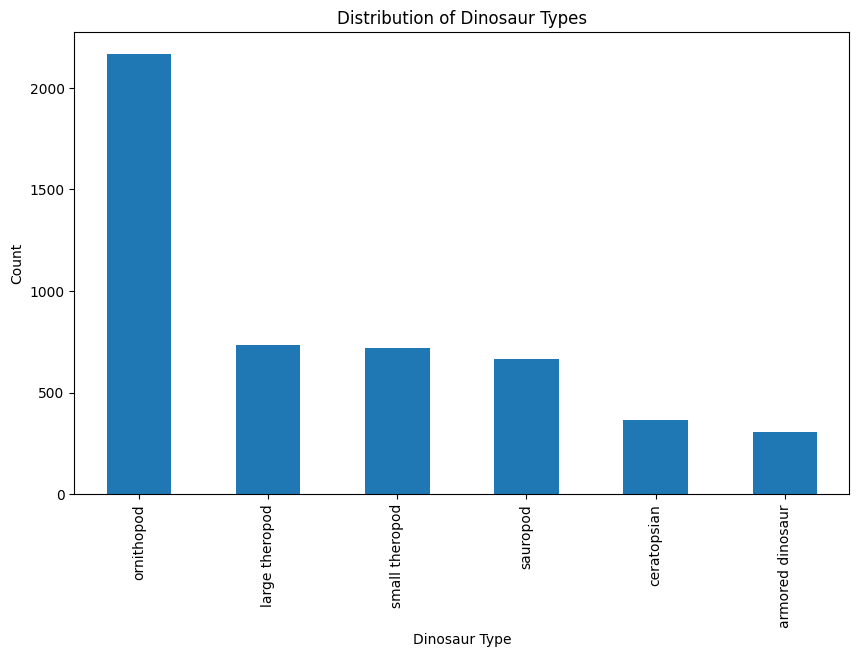

In [12]:
# 2. What is the distribution of dinosaur types?
plt.figure(figsize=(10, 6))
dinosaurs_df['type'].value_counts().plot(kind='bar')
plt.title('Distribution of Dinosaur Types')
plt.xlabel('Dinosaur Type')
plt.ylabel('Count')
plt.show()

The distribution of dinosaur types indicates that Ornithopod the most common types found in the dataset.

In [ ]:
# 3. What is the geographical distribution of dinosaur fossil findings?

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
plt.figure(figsize=(14, 8))

# Plot the world map
world.plot(ax=plt.gca(), color='lightgrey')

# Use a scatter plot to visualize density
sns.scatterplot(
    x='lng', y='lat', 
    hue='length_m', size='length_m', 
    sizes=(20, 200), alpha=0.6, 
    palette='viridis', data=dinosaurs_df
)

plt.title('Geographical Distribution of Dinosaur Fossil Findings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(-180, 180)  
plt.ylim(-90, 90)    
plt.legend(title='Dinosaur Length (m)', loc='upper right')
plt.show()


In [ ]:
# 4. What is the relationship between dinosaur length and diet?
plt.figure(figsize=(10, 6))
dinosaurs_df.boxplot(column='length_m', by='diet')
plt.title('Dinosaur Length by Diet')
plt.suptitle('')
plt.xlabel('Diet')
plt.ylabel('Length (meters)')
plt.show()

The relationship between dinosaur length and diet shows that herbivorous dinosaurs tend to be longer on average and omnivorous dinosaurs tend to be smaller compared to carnivorous dinosaurs.

In [ ]:
# 5. How did the number of dinosaurs found in each era change over time?
plt.figure(figsize=(10, 6))

# Plot the number of dinosaur fossils found over time
dinosaurs_df.groupby('max_ma')['occurrence_no'].count().plot()

# Filter out rows with missing length values
dinosaurs_non_missing_length = dinosaurs_df.dropna(subset=['length_m'])

# Highlight the background for each era
plt.axvspan(251.902, 201.3, color='lightgreen', alpha=0.3, label='Triassic')
plt.axvspan(201.3, 145, color='lightblue', alpha=0.3, label='Jurassic')
plt.axvspan(145, 66, color='lightcoral', alpha=0.3, label='Cretaceous')

# Titles and Labels
plt.title('Number of Dinosaur Fossils Found Over Time')
plt.xlabel('Age (million years ago)')
plt.ylabel('Number of Dinosaurs')

plt.grid(True)
plt.gca().invert_xaxis()
plt.legend()
plt.show()







The number of dinosaurs found in each era shows a peak during the Jurassic and Cretaceous periods, indicating a better fossil record during these times compared to the fossil record found during Triassic.